## Smartphone Price Prediction

In [15]:
pip install --ignore-installed torch

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2023.4.0 requires fsspec==2023.4.0, but you have fsspec 2024.3.1 which is incompatible.



  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/2a/b7/a3cf5fd40334b9785cc83ee0c96b50603026eb3aa70210a33729018e7029/torch-2.3.0-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.3.0-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/41/24/0b023b6537dfc9bae2c779353998e3e99ac7dfff4222fc6126650e93c3f3/filelock-3.14.0-py3-none-any.whl.metadata
  Using cached filelock-3.14.0-py3-none-any.whl.metadata (2.8 kB)
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/01/f3/936e209267d6ef7510322191003885de524fc48d1b43269810cd589ceaf5/typing_extensions-4.11.0-py3-none-any.whl.metadata
  Using cached typing_extensions-4.11.0-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for sympy from https://files.pythonhosted.org/packages/d2/05/e6600db80270777c4a64238a98d442f0fd07cc8915be2a1c16da7f2b9e7

In [23]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

In [24]:
df = pd.read_csv("smartphone_cleaned_v2.csv")
df.dropna(inplace=True)
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,...,ram_capacity,internal_memory,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,Snapdragon 8 Gen2,snapdragon,Octa Core,...,12.0,256.0,120,1440 x 3216,3,1,android,50,16,0
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,Snapdragon 695,snapdragon,Octa Core,...,6.0,128.0,120,1080 x 2412,3,1,android,64,16,1 TB
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,Exynos 1330,exynos,Octa Core,...,4.0,64.0,90,1080 x 2408,3,1,android,50,13,1 TB
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,Snapdragon 695,snapdragon,Octa Core,...,6.0,128.0,120,1080 x 2400,3,1,android,50,16,1 TB
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,Dimensity 1080,dimensity,Octa Core,...,6.0,128.0,120,1080 x 2412,3,1,android,108,16,0


In [25]:
numerical_features = ['rating', 'ram_capacity', 'internal_memory', 'refresh_rate', 'num_rear_cameras', 'processor_speed', 'battery_capacity', 'fast_charging']

# create tensor of input features
X = torch.tensor(df[numerical_features].values, dtype=torch.float)
# create tensor of targets
y = torch.tensor(df['price'].values, dtype=torch.float).view(-1,1)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
    train_size=0.70,
    test_size=0.30,
    random_state=2) 

In [27]:
torch.manual_seed(42)
input_size = 8  

model = nn.Sequential(
    nn.Linear(input_size, 686),  
    nn.ReLU(),                
    nn.Linear(686, 1372),        
    nn.ReLU(),                             
    nn.Linear(1372, 1) 
)

loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
predictions = model(X_train) 

In [28]:
num_epochs = 1000
for epoch in range(num_epochs):
    predictions = model(X_train) 
    MSE = loss(predictions, y_train) 
    MSE.backward()
    optimizer.step() 
    optimizer.zero_grad()
    
    # keep track of the loss during training
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], MSE Loss: {MSE.item()}')

Epoch [100/1000], MSE Loss: 1669504128.0
Epoch [200/1000], MSE Loss: 1352689536.0
Epoch [300/1000], MSE Loss: 1305296896.0
Epoch [400/1000], MSE Loss: 1258047744.0
Epoch [500/1000], MSE Loss: 1206009856.0
Epoch [600/1000], MSE Loss: 1151834240.0
Epoch [700/1000], MSE Loss: 1110650240.0
Epoch [800/1000], MSE Loss: 1087149568.0
Epoch [900/1000], MSE Loss: 1072970368.0
Epoch [1000/1000], MSE Loss: 1063639808.0


In [29]:
torch.save(model, 'model.pth')

In [30]:
loaded_model = torch.load('model.pth')
loaded_model.eval()
with torch.no_grad():
    predictions = loaded_model(X_test)
    test_MSE = loss(predictions, y_test)

# show output
print('Test MSE is ' + str(test_MSE.item()))
print('Test Root MSE is ' + str(test_MSE.item()**(1/2)))

Test MSE is 245083680.0
Test Root MSE is 15655.148673838905


In [32]:
print("y_test shape:", y_test.shape)
print("predictions shape:", predictions.shape)

y_test shape: torch.Size([238, 1])
predictions shape: torch.Size([238, 1])


In [35]:
y_test_np = y_test.numpy()
predictions_np = predictions.detach().numpy()

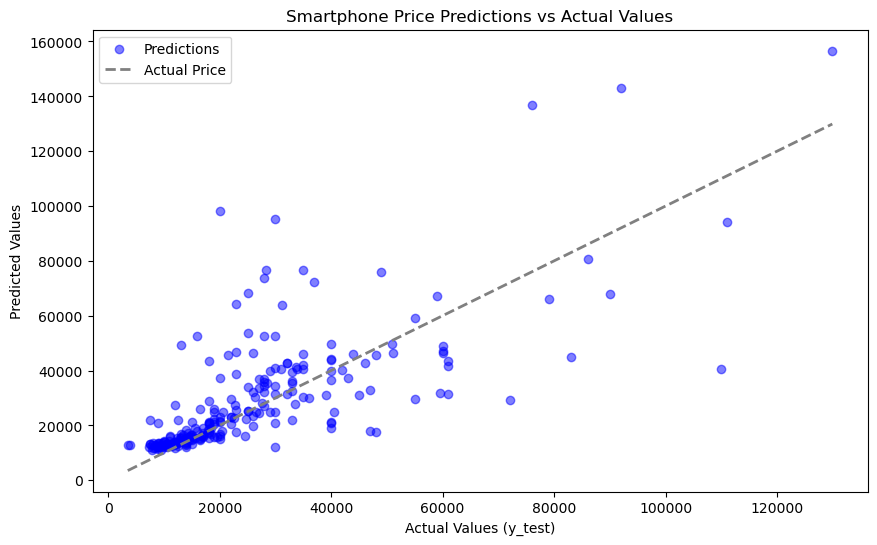

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, predictions_np, label='Predictions', alpha=0.5, color='blue')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')

plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], linestyle='--', color='gray', linewidth=2,
         label="Actual Price")
plt.legend()
plt.title('Smartphone Price Predictions vs Actual Values')
plt.show()